In [103]:
# CAPSTONE TWO
# Load packages
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set WD
os.chdir('/Users/andrew/Desktop/Capstone Two')

In [104]:
# Read data
df = pd.read_csv('housing.csv')
# Print first 5 rows
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [105]:
# Shape of the data
df.shape #545 rows, 13 columns

(545, 13)

In [106]:
# get non null counts & Data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [107]:
# Search for missing values / NA / NaN
df.isnull().sum()

# If no missing values, print statement
if (df.all().isnull().sum() == 0):
    print("No missing values found.")


No missing values found.


There was a total of 15 outliers identified.


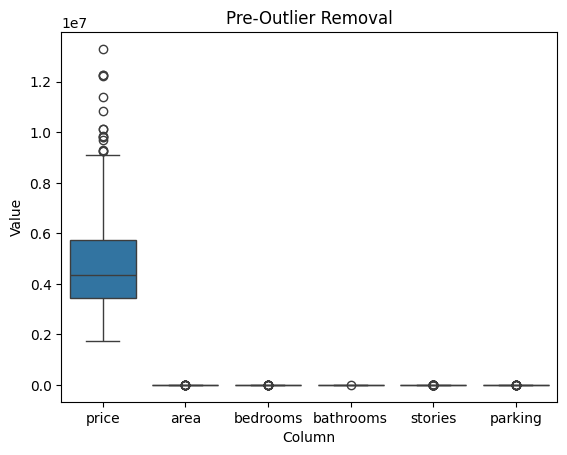

In [108]:
# Outlier Identification
sns.boxplot(data=df)
plt.xlabel("Column")
plt.ylabel('Value')
plt.title("Pre-Outlier Removal")
# Outliers found in price outside of the IQR

# Identification

# IQR Calculation
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

# Bounds Identification
lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

# Find outliers outside of the bounds
outliers = df[(df['price'] <= lowerbound) | (df['price'] >= upperbound)]

# Print number of outliers 
print(f"There was a total of",len(outliers),'outliers identified.')

(530, 13)


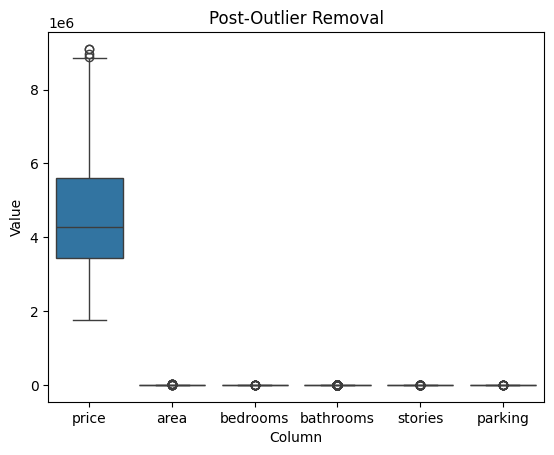

In [109]:
# Subset df to remove outliers
df = df[(df['price'] >= lowerbound) & (df['price'] <= upperbound)]
print(df.shape)

# Plot for confirmation
sns.boxplot(data=df)
plt.xlabel("Column")
plt.ylabel('Value')
plt.title("Post-Outlier Removal")
plt.show();

In [110]:
# Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,530.0,4.600663e+06,1.596119e+06,1750000.0,3430000.0,4270000.0,5600000.00,9100000.0
area,530.0,5.061519e+03,2.075449e+03,1650.0,3547.5,4500.0,6315.75,15600.0
bedrooms,530.0,2.943396e+00,7.305149e-01,1.0,2.0,3.0,3.00,6.0
bathrooms,530.0,1.260377e+00,4.643591e-01,1.0,1.0,1.0,1.00,3.0
stories,530.0,1.788679e+00,8.611902e-01,1.0,1.0,2.0,2.00,4.0
parking,530.0,6.641509e-01,8.433201e-01,0.0,0.0,0.0,1.00,3.0


In [111]:
# Check for Duplicated rows
df.duplicated().sum()

# If no duplicate values, print statement
if (df.duplicated().sum() == 0):
    print("No duplicate values found.")

No duplicate values found.


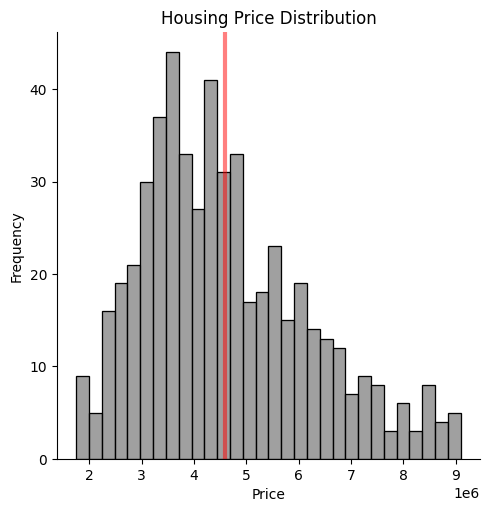

In [112]:
# Housing price distribution
# Calculate mean home price
pricemean = df['price'].mean()

# Distribution plot to show prices
sns.displot(df['price'], bins=30, color='gray')

# Plot features
plt.axvline(pricemean, color='red', linewidth=3, alpha=0.5)
plt.title('Housing Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency');

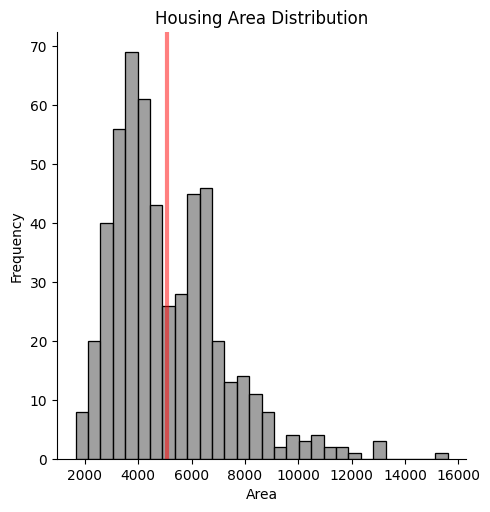

In [113]:
# Housing area distribution
# Calculate mean area per home
areamean = df['area'].mean()

# Dsitribution plot to show areas
sns.displot(df['area'], bins=30, color='gray')

# Plot features
plt.axvline(areamean, color='red', linewidth=3, alpha=0.5)
plt.title('Housing Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency');

# Area and price seem to have a correlation based on the plot distributions

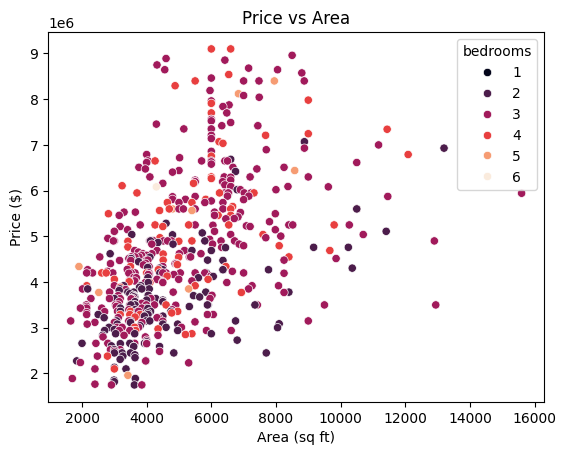

In [114]:
# Area VS Price scatterplot
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='rocket')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.show();

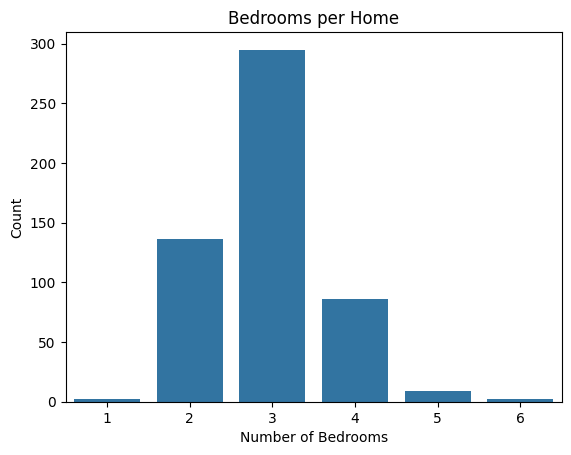

3 Bedrooms is the most frequent in the data, with 295 homes having 3 bedrooms.


In [115]:
# Bedrooms countplot
sns.countplot(x='bedrooms', data=df)
plt.title("Bedrooms per Home")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show();

# Count most frequent value (3)
most_freq = (df['bedrooms'] ==3).sum()

print(f'3 Bedrooms is the most frequent in the data, with',most_freq,'homes having 3 bedrooms.')
# 3 bedrooms is most common for houses in the dataset

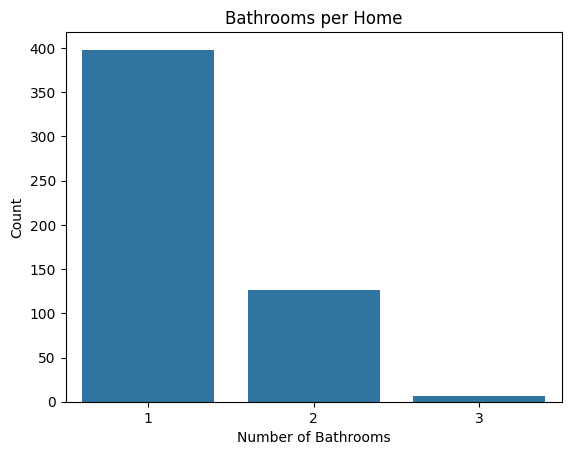

1 bathroom is most common for houses in the dataset, with very few homes having 3 bathrooms


In [116]:
# Bathrooms countplot
sns.countplot(x='bathrooms', data=df)
plt.title("Bathrooms per Home")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show();

print('1 bathroom is most common for houses in the dataset, with very few homes having 3 bathrooms')

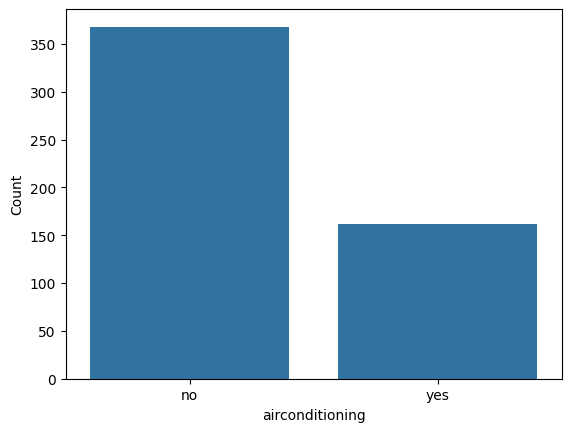

Percent of houses with air conditioning; 30.566 %


In [117]:
# Does the property have A/C?
sns.countplot(x='airconditioning', data=df)
plt.ylabel('Count')
plt.show();

# Majority of houses in the dataset dont have A/C

# Calculate percent of houses with air conditioning
AC_houses = round((df['airconditioning'] == 'yes').sum() / len(df) * 100, 4)
print(f'Percent of houses with air conditioning;',AC_houses,'%')

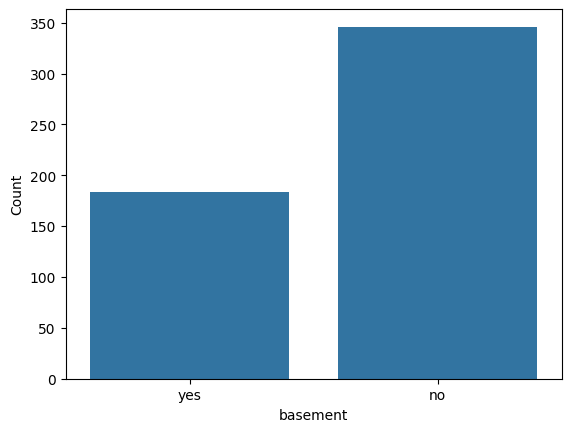

Percent of houses with a basement; 34.717 %


In [118]:
# Basement Countplot
sns.countplot(x='basement', data=df)
plt.ylabel('Count')
plt.show();

# Majority of houses in the dataset dont have a basement

# Count the percent of houses with a basement
basement_houses = round((df['basement'] == 'yes').sum() / len(df) * 100, 4)
print(f'Percent of houses with a basement;',basement_houses,'%')

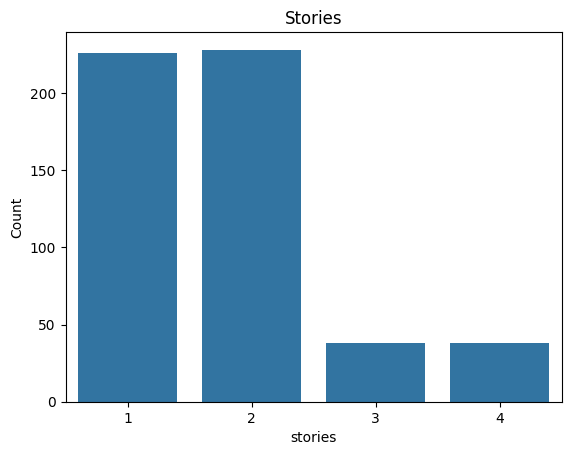

In [119]:
# Stories per house countplot
sns.countplot(x='stories', data=df)
plt.title("Stories")
plt.ylabel('Count')
plt.show();

# Most homes have 1 or 2 stories, with some having up to 4

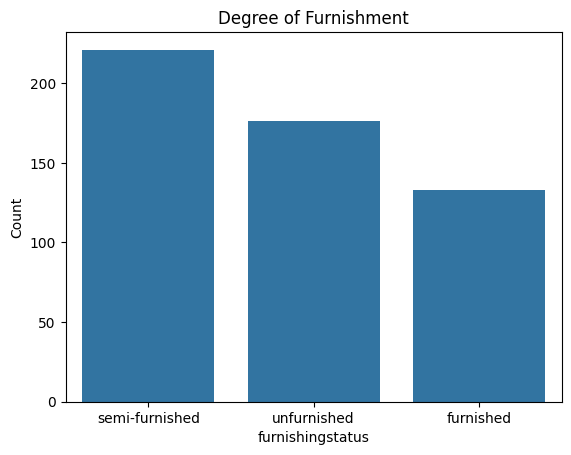

In [120]:
# Furnish countplot
sns.countplot(x='furnishingstatus', data=df)
plt.title("Degree of Furnishment")
plt.ylabel('Count')
plt.show();

In [121]:
#list categorical features
catfeats = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Create binary features for categorical columns
df = pd.get_dummies(df, columns=catfeats).astype(int)

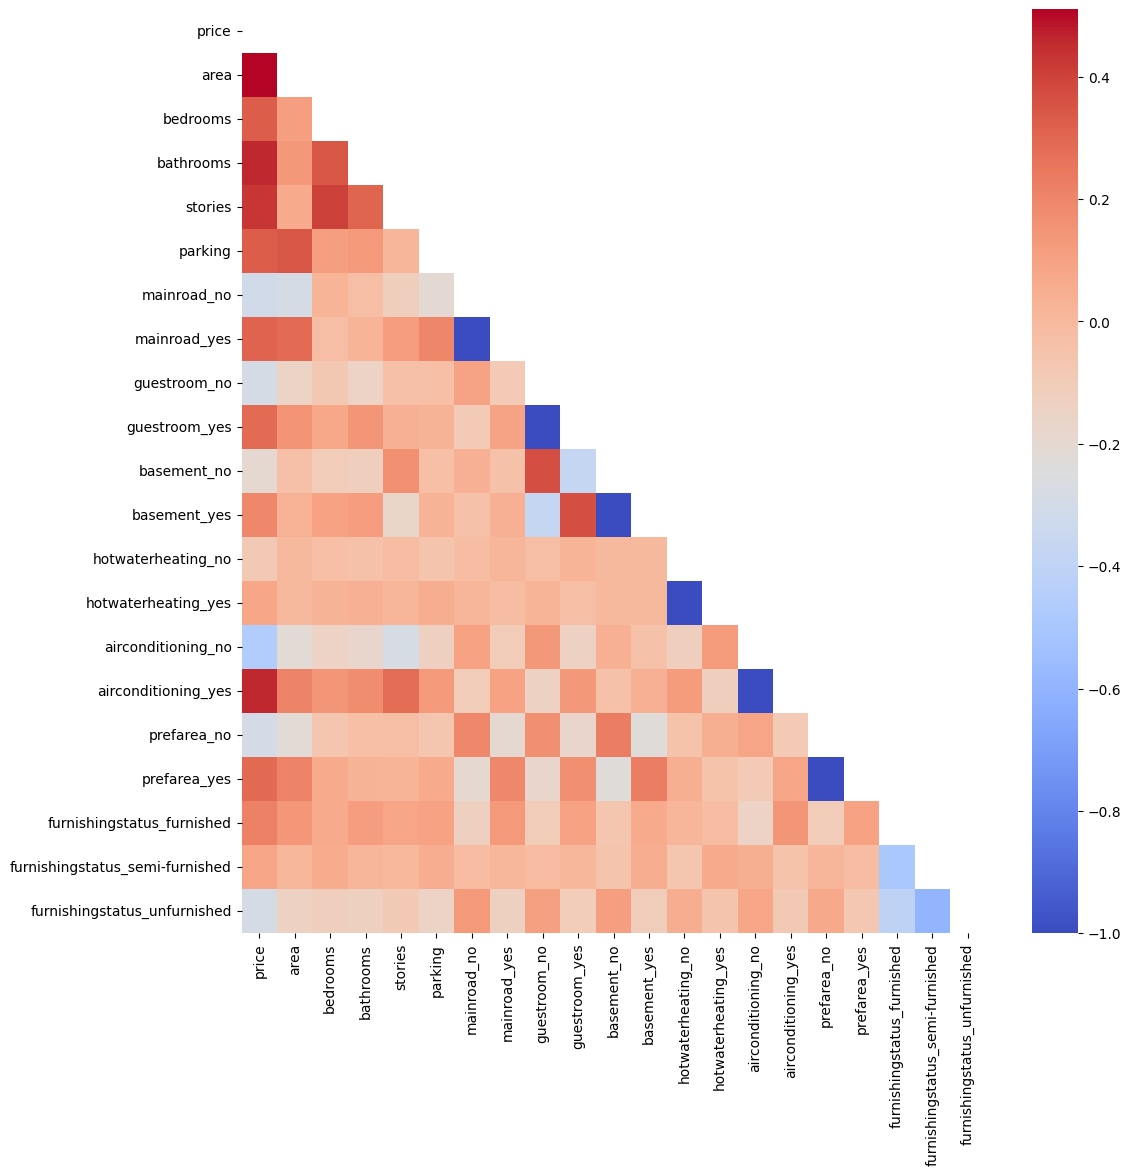

In [122]:
# Correlation Heatmap
corr = df.corr()

# Mask to remove duplicate correlations
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=False, mask=mask, cmap='coolwarm');

# Price is correlated most with area, bathrooms, air conditioning and stories of the house

In [123]:
# Feature Engineering

# Price / Area
df['price_per_area'] = df['price'] / df['area']

# Total rooms per house
df['total_rooms'] = df['bathrooms'] + df['bedrooms'] + df['guestroom_yes']

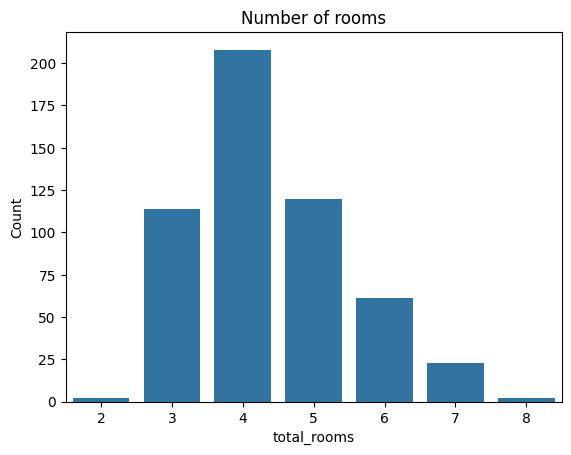

In [124]:
# Total rooms
sns.countplot(x='total_rooms', data=df)
plt.title("Number of rooms")
plt.ylabel('Count')
plt.show();

# From bedrooms, bathrooms, and guestrooms, most properties have 4.

On average, you can expect to pay 981.1816 per square foot
Price per sq ft is normally distributed around the mean of 981.1816
There is a total of 240 houses with price per sq ft over the mean, which equates to 45.283 % of the data


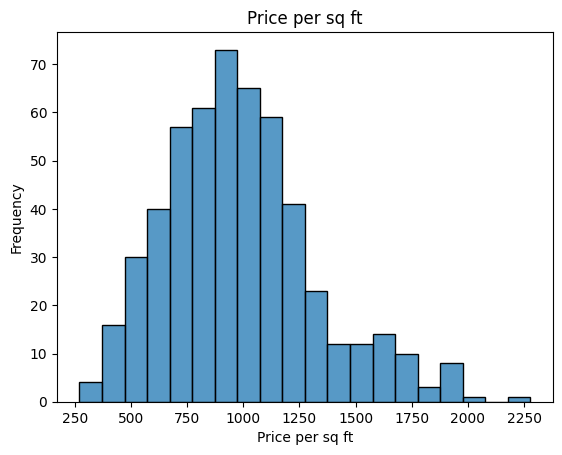

In [125]:
#Calculate Mean price per sq ft per home
meanprice = round(df['price_per_area'].mean(), 4)

# Barplot representing cost per sq ft, per house
sns.histplot(df['price_per_area'])
plt.title('Price per sq ft')
plt.xlabel('Price per sq ft')
plt.ylabel('Frequency');

print(f"On average, you can expect to pay",meanprice,"per square foot")

# Find the percent of houses in the dataset that cost more than the mean
countovermean = (df['price_per_area'] >= meanprice).sum()
percent_fromtotal = round(countovermean / len(df) * 100, 4)
print(f"Price per sq ft is normally distributed around the mean of {meanprice}")
print(f"There is a total of",countovermean,"houses with price per sq ft over the mean, which equates to",percent_fromtotal,"% of the data")

In [126]:
df.shape

(530, 23)

### Exploratory Data Analysis Summary

* The dataset contained no missing values or duplicated rows.
* Using the IQR, 15 outliers were identified in the price column, and removed from the data.
* 3 bedrooms with 1 bathroom is most common for homes in the dataset.
* 1-2 stories is common, with some homes having up to 4.
* The price of a home is correlated most with the area (in sq ft), number of bathrooms, air conditioning, and number of stories the house contains.
* On average, you can expect to pay approximately $993 per square foot of property.
* Dummy features were created using pd.get_dummies for categorical columns. The final shape of the dataframe is 530 rows by 23 columns

In [127]:
#Save independent variable 'Price'
price = df['price']

#Drop our 'Y', price
df = df.drop(columns='price')

#Initialize scaler to normalize features
scaler = MinMaxScaler()

#Scale the features
scaled_features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_features


,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_area,total_rooms
0,0.311828,0.6,0.0,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.620709,0.500000
1,0.354839,0.6,0.5,0.333333,0.333333,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.552038,0.833333
2,0.491039,0.4,0.5,1.000000,0.666667,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.390335,0.500000
3,0.211470,0.4,0.5,0.333333,0.666667,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.827870,0.666667
4,0.341935,0.4,0.5,0.333333,0.333333,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.552285,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.096774,0.2,0.0,0.000000,0.666667,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.167481,0.166667
526,0.053763,0.4,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.232051,0.333333
527,0.141219,0.2,0.0,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.106100,0.166667
528,0.090323,0.4,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.164845,0.333333


In [128]:
# Split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, price, test_size=0.2, shuffle=True, random_state=999)

In [129]:
print("Training features shape:")
print(X_train.shape)
print("Testing features shape:")
print(X_test.shape)
print('Training columns to predict (price) shape:')
print(y_train.shape)
print('Testing columns to predict (price) shape:')
print(y_test.shape)

Training features shape:
(424, 22)
Testing features shape:
(106, 22)
Training columns to predict (price) shape:
(424,)
Testing columns to predict (price) shape:
(106,)


In [130]:
# Fit to linear regression model and predict prices
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Calculate scoring metrics
lr_mape = mean_absolute_percentage_error(y_test, y_pred) * 100
lr_rmse = root_mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

# Print results
print(f"Linear Regression R^2: {lr_r2}")
print(f"Linear Regression MAPE: {lr_mape}") 
print(f"Linear Regression RMSE: {lr_rmse}")

Linear Regression R^2: 0.7996303932212458
Linear Regression MAPE: 11.313885353464782
Linear Regression RMSE: 669476.1160688286


In [131]:
 # Fit to Ridge Regression Model and predict prices
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Calculate scoring metrics
ridge_mape = mean_absolute_percentage_error(y_test, y_pred) * 100
ridge_rmse = root_mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

# Print results
print(f"Ridge Regression R^2: {ridge_r2}")
print(f"Ridge Regression MAPE: {ridge_mape}")
print(f"Ridge Regression RMSE: {ridge_rmse}")

Ridge Regression R^2: 0.7824002592749115
Ridge Regression MAPE: 12.297899012687006
Ridge Regression RMSE: 697667.2741267385


In [132]:
 # Fit to Decision Tree Model and predict prices
dt = DecisionTreeRegressor(random_state=999)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Calculate scoring metrics
dt_mape = mean_absolute_percentage_error(y_test, y_pred) * 100
dt_rmse = root_mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

# Print results
print(f"Decision Tree Regression R^2: {dt_r2}")
print(f"Decision Tree Regression MAPE: {dt_mape}")
print(f"Decision Tree Regression RMSE: {dt_rmse}")

Decision Tree Regression R^2: 0.9472967223083151
Decision Tree Regression MAPE: 5.6965477417493435
Decision Tree Regression RMSE: 343350.73206892126


In [133]:
 # Fit to Random Forest Model and predict prices
rf = RandomForestRegressor(random_state=999)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate scoring metrics
rf_mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rf_rmse = root_mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Print results
print(f"Random Forest Regression R^2: {rf_r2}")
print(f"Random Forest Regression MAPE: {rf_mape}")
print(f"Random Forest Regression RMSE: {rf_rmse}")


Random Forest Regression R^2: 0.9718201125033417
Random Forest Regression MAPE: 3.9840064154911876
Random Forest Regression RMSE: 251066.513945462


In [134]:
 # Fit to Gradient Boosting model and predict prices
gbr = GradientBoostingRegressor(random_state=999)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Calculate scoring metrics
gbr_mape = mean_absolute_percentage_error(y_test, y_pred) * 100
gbr_rmse = root_mean_squared_error(y_test, y_pred)
gbr_r2 = r2_score(y_test, y_pred)

# Print results
print(f"Gradient Boosting Regression R^2: {gbr_r2}")
print(f"Gradient Boosting Regression MAPE: {gbr_mape}")
print(f"Gradient Boosting Regression RMSE: {gbr_rmse}")

Gradient Boosting Regression R^2: 0.9814478920563193
Gradient Boosting Regression MAPE: 3.6767071990189844
Gradient Boosting Regression RMSE: 203711.61707839416


In [135]:
# Hyper parameter tuning -
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Initialize grid search for gbr
gbr_grid = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5)

# Fit the grid search
gbr_grid.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {gbr_grid.best_params_}")

# Get the best model
best_model = gbr_grid.best_estimator_

# Evaluate the best model for both training and validation
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}


In [136]:
# Calculate performance metrics for the best model for both training and validation
train_rmse_best = root_mean_squared_error(y_train, y_train_pred_best)
train_mape_best = mean_absolute_percentage_error(y_train, y_train_pred_best)
train_r2_best = r2_score(y_train, y_train_pred_best)
test_rmse_best = root_mean_squared_error(y_test, y_test_pred_best)
test_mape_best = mean_absolute_percentage_error(y_test, y_test_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

# Print results
print(f"Best Model - Train R^2: {train_r2_best:.2f}, Test R^2: {test_r2_best:.2f}")
print(f"Best Model - Train MAPE: {train_mape_best:.2f}, Test MAPE: {test_mape_best:.2f}")
print(f"Best Model - Train RMSE: {train_rmse_best:.2f}, Test RMSE: {test_rmse_best:.2f}")

Best Model - Train R^2: 1.00, Test R^2: 0.98
Best Model - Train MAPE: 0.01, Test MAPE: 0.03
Best Model - Train RMSE: 29394.22, Test RMSE: 196233.59


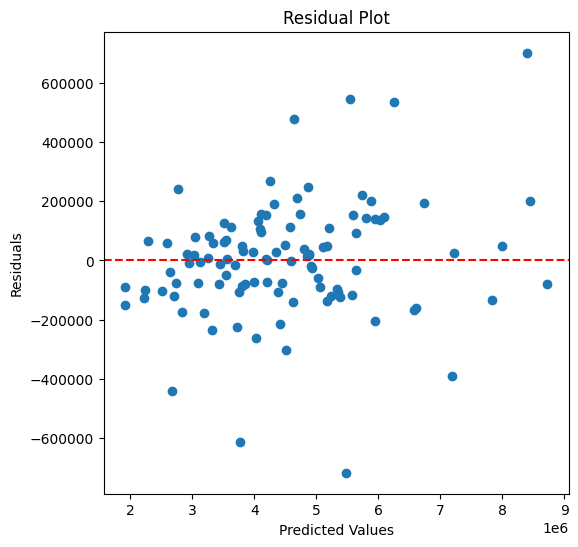

In [137]:
# Calculate residuals from best model
residuals = y_test - y_test_pred_best

#Plot the residuals to see model performance
plt.figure(figsize=(6, 6))
plt.scatter(y_test_pred_best, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


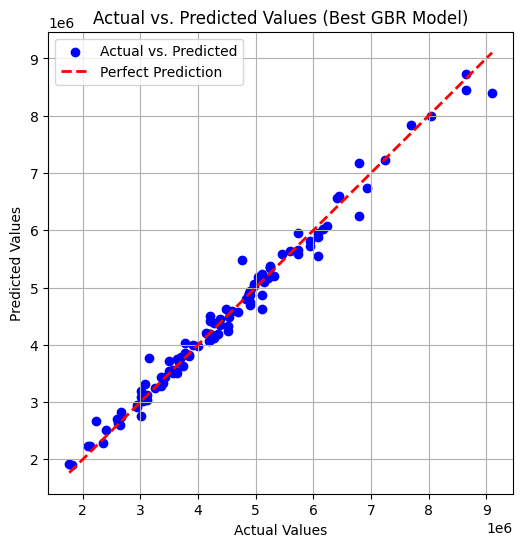

In [138]:
# Plot the residuals against the actual values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_best, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Best GBR Model)')
plt.legend()
plt.grid(True)
plt.show()

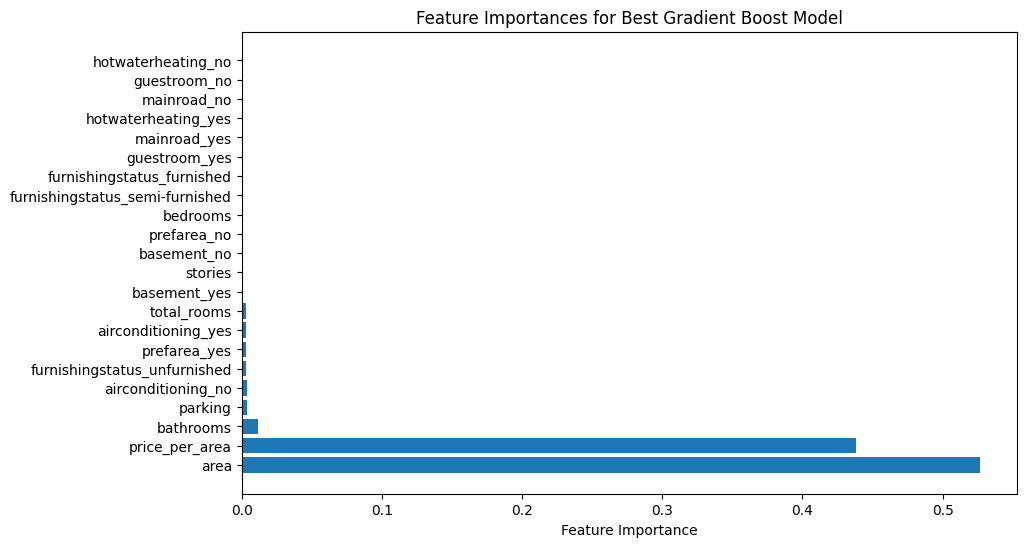

In [139]:
# Assess feature importances from the best gbr model
feature_importances = best_model.feature_importances_
feature_names = scaled_features.columns

# Sort the features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[indices], align='center')
plt.yticks(range(len(feature_importances)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Best Gradient Boost Model')
plt.show()

### Modelling Summary

* 5 models were tested "out of the box"; Linear Regressor, Ridge Regressor, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor.
* The Gradient Boosting Regression Model had the best "out of the box" results, with a R^2 of 0.98, MAPE of 3.67, and RMSE of 203,311.
* The GBR model had its hyperparameters tuned using grid search, where the scoring metrics improved drastically:
    * Gradient Boosting Regression R^2 before and after tuning: from 0.98 to 0.98 (no improvement)
    * Gradient Boosting Regression MAPE before and after tuning: from 3.67 to 0.03
    * Gradient Boosting Regression RMSE before and after tuning: from 203711.61 to 196233.59
* Feature importance was extracted from the model to find that `area`, `price per area`, and `bathrooms` have the greatest importance for predicting home prices.